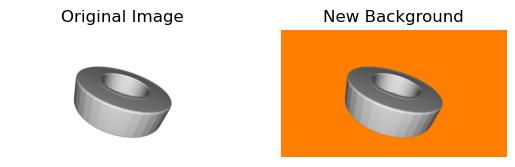

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_background(image_path, background_path, output_path):
    # Load the image and check if it's loaded successfully
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the background image and check if it's loaded successfully
    background = cv2.imread(background_path)
    if background is None:
        print(f"Error: Unable to load background image at {background_path}")
        return

    # Convert the background image to RGB
    background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Use a threshold to create a binary mask of the foreground
    _, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    # Create an inverted mask to keep the background
    mask_inv = cv2.bitwise_not(mask)

    # Extract the foreground and background using the masks
    foreground = cv2.bitwise_and(image, image, mask=mask)
    background_roi = cv2.bitwise_and(background, background, mask=mask_inv)

    # Combine the foreground and background
    result = cv2.add(foreground, background_roi)

    # Display the original image and the result
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("New Background")
    plt.imshow(result)
    plt.axis('off')

    plt.show()

    # Save the result
    cv2.imwrite(output_path, cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

if __name__ == "__main__":
    # Specify the paths to the input image, background image, and output image
    input_image_path = "../old_structure/Screenshots/6800zz/test_5_4_5.jpg"
    background_image_path = "../orange-background.jpeg"
    output_image_path = "../../result.jpg"

    # Remove background and replace with the new background
    remove_background(input_image_path, background_image_path, output_image_path)
